In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

In [3]:
# original data
pd.read_csv('Video_Games.csv',header=0).head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   
5  Nintendo     23.20      2.26      4.22         0.58         30.26   
6  Nintendo     11.28      9.14      6.50         2.88         29.80   
7  Nintendo     13.96      9.18      2.93         2.84         28.92   
8  Nintendo     14.44      6.94      4.70         2.24         28.32   
9  Nintendo     26.93      0.63      0.28         0.47         28.31   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          51.0          8       322.0  Nintendo      E  
1           NaN           NaN        NaN         NaN       NaN    NaN  
2          82.0          73.0        8.3       709.0  Nintendo      E  
3          80.0          73.0          8       192.0  Nintendo      E  
4           NaN           NaN        NaN         NaN       NaN    NaN  
5           NaN           NaN        NaN         NaN       NaN    NaN  
6          89.0          65.0        8.5       431.0  Nintendo      E  
7          58.0          41.0        6.6       129.0  Nintendo      E  
8          87.0          80.0        8.4       594.0  Nintendo      E  
9           NaN           NaN        NaN         NaN       NaN    NaN

In [2]:
# encoded data
df = pd.read_csv("Fully_Encoded.csv", header=0)
df.head(10)

Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
0  10919.0      26.0           2006.0   10.0      361.0     41.36     28.96   
1   9265.0      11.0           1985.0    4.0      361.0     29.08      3.58   
2   5534.0      26.0           2008.0    6.0      361.0     15.68     12.76   
3  10921.0      26.0           2009.0   10.0      361.0     15.61     10.93   
4   7294.0       5.0           1996.0    7.0      361.0     11.27      8.89   
5   9646.0       5.0           1989.0    5.0      361.0     23.20      2.26   
6   6677.0       4.0           2006.0    4.0      361.0     11.28      9.14   
7  10917.0      26.0           2006.0    3.0      361.0     13.96      9.18   
8   6680.0      26.0           2009.0    4.0      361.0     14.44      6.94   
9   2566.0      11.0           1984.0    8.0      361.0     26.93      0.63   

   JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0      3.77         8.45         82.53     76.000000     51.000000   
1      6.81         0.77         40.24     68.997119     26.440992   
2      3.79         3.29         35.52     82.000000     73.000000   
3      3.28         2.95         32.77     80.000000     73.000000   
4     10.22         1.00         31.37     68.997119     26.440992   
5      4.22         0.58         30.26     68.997119     26.440992   
6      6.50         2.88         29.80     89.000000     65.000000   
7      2.93         2.84         28.92     58.000000     41.000000   
8      4.70         2.24         28.32     87.000000     80.000000   
9      0.28         0.47         28.31     68.997119     26.440992   

   User_Score  User_Count    Developer    Rating  
0   77.000000  322.000000  1008.000000  1.000000  
1   74.727254  163.008846   835.050081  3.558616  
2   80.000000  709.000000  1008.000000  1.000000  
3   77.000000  192.000000  1008.000000  1.000000  
4   74.727254  163.008846   835.050081  3.558616  
5   74.727254  163.008846   835.050081  3.558616  
6   82.000000  431.000000  1008.000000  1.000000  
7   63.000000  129.000000  1008.000000  1.000000  
8   81.000000  594.000000  1008.000000  1.000000  
9   74.727254  163.008846   835.050081  3.558616

In [3]:
# split into feature columns and sales columns (y vars.)
sales = [name for name in list(df.columns) if 'Sales' in name]
feats = [name for name in list(df.columns) if name not in sales]

y_cols = df[sales]
x_cols = df[feats]

x_cols


Name  Platform  Year_of_Release  Genre  Publisher  Critic_Score  \
0      10919.0      26.0           2006.0   10.0      361.0     76.000000   
1       9265.0      11.0           1985.0    4.0      361.0     68.997119   
2       5534.0      26.0           2008.0    6.0      361.0     82.000000   
3      10921.0      26.0           2009.0   10.0      361.0     80.000000   
4       7294.0       5.0           1996.0    7.0      361.0     68.997119   
...        ...       ...              ...    ...        ...           ...   
16411   8236.0      17.0           2016.0    0.0      502.0     68.997119   
16412   5084.0      28.0           2006.0   10.0       91.0     68.997119   
16413   3828.0      20.0           2016.0    1.0      233.0     68.997119   
16414   8913.0       6.0           2003.0    4.0      547.0     68.997119   
16415  10963.0      20.0           2016.0    9.0      502.0     68.997119   

       Critic_Count  User_Score  User_Count    Developer    Rating  
0         51.000000   77.000000  322.000000  1008.000000  1.000000  
1         26.440992   74.727254  163.008846   835.050081  3.558616  
2         73.000000   80.000000  709.000000  1008.000000  1.000000  
3         73.000000   77.000000  192.000000  1008.000000  1.000000  
4         26.440992   74.727254  163.008846   835.050081  3.558616  
...             ...         ...         ...          ...       ...  
16411     26.440992   74.727254  163.008846   835.050081  3.558616  
16412     26.440992   74.727254  163.008846   835.050081  3.558616  
16413     26.440992   74.727254  163.008846   835.050081  3.558616  
16414     26.440992   74.727254  163.008846   835.050081  3.558616  
16415     26.440992   74.727254  163.008846   835.050081  3.558616  

[16416 rows x 11 columns]

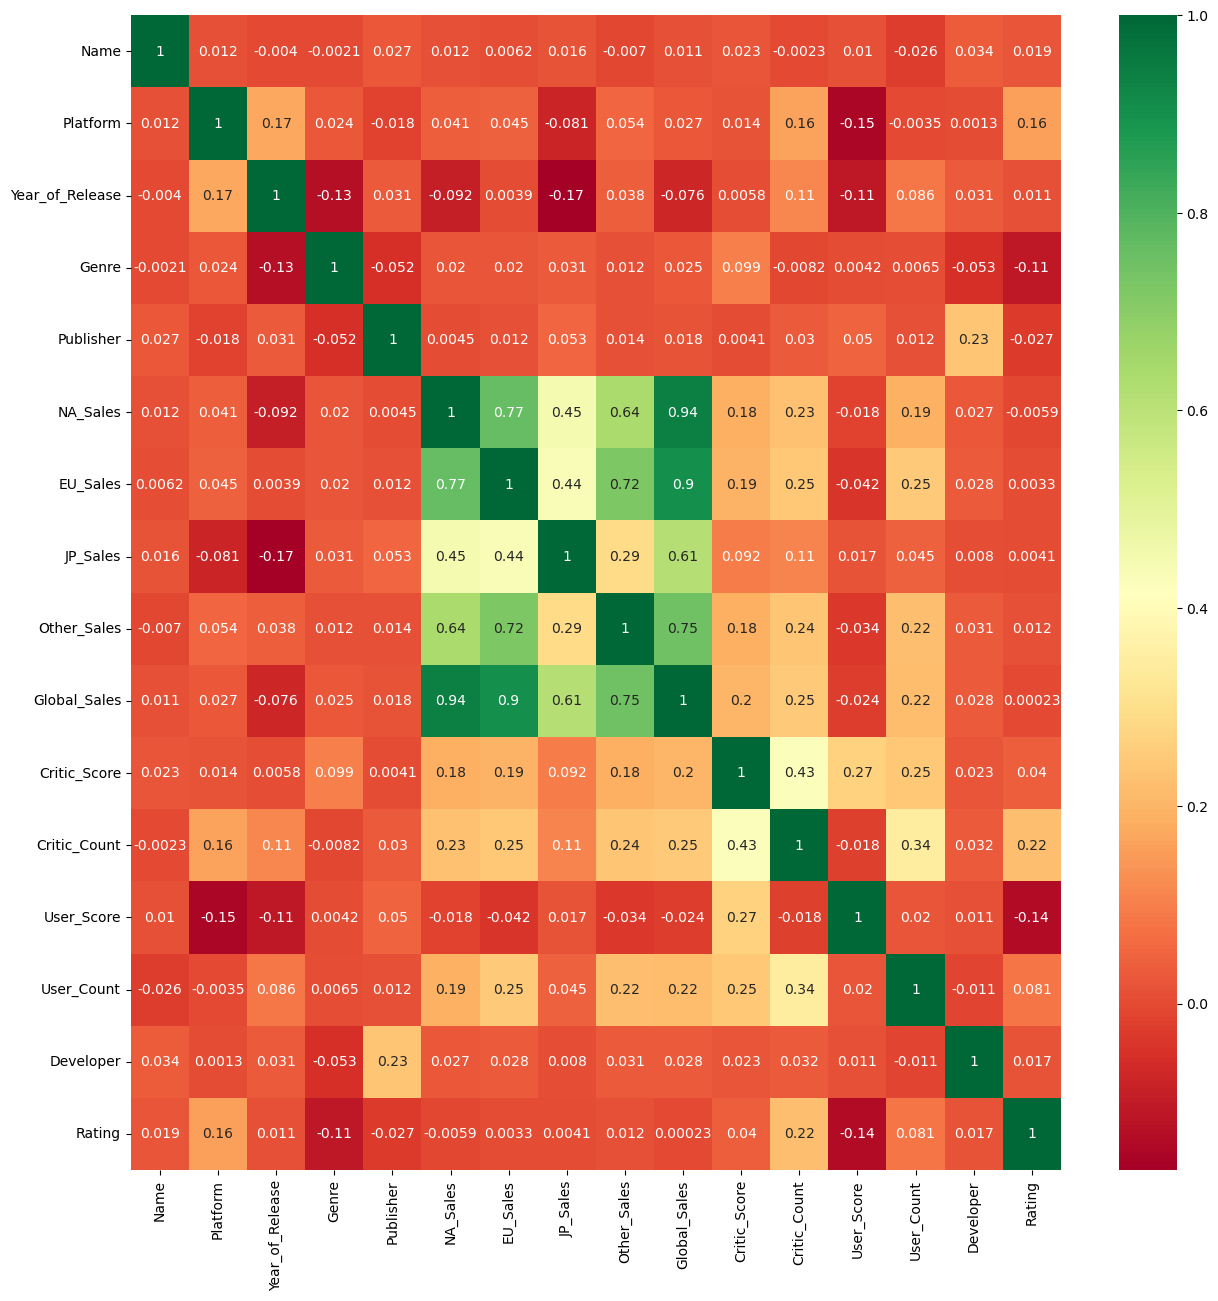

In [4]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

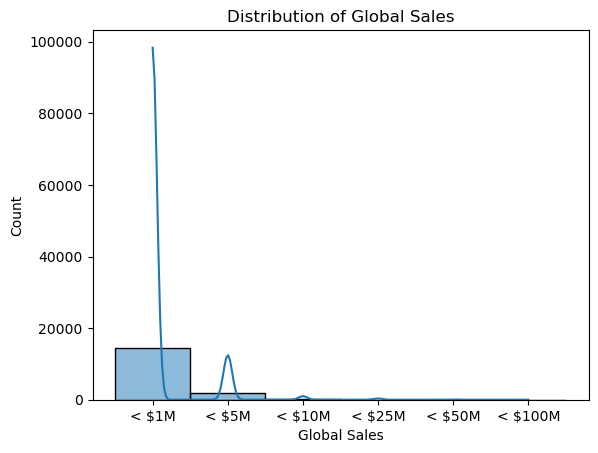

In [5]:
cuts = [0, 1, 5, 10, 25, 50, 100]
y = y_cols['Global_Sales']

bin_labels = [f"< ${c}M" for c in cuts][1:]
y = pd.cut(y,bins = cuts, labels = bin_labels)

y_var = pd.Series(y, name = "Global Sales")
 
# Plot histogram
sns.histplot(data = y_var, kde = True)
plt.title('Distribution of Global Sales')

plt.show()


In [6]:
# create bins to encode sales columns
cuts = [float('-inf'), 0, 0.5, 1, 5, 10, 25, 50, 100]
bin_labels = [f"< ${c}M" for c in cuts][1:]
y_bins = {}

for y in y_cols:
    y_bins[y] = pd.Series(pd.cut(y_cols[y], bins = cuts, labels = bin_labels))
    
y_col_bins = pd.DataFrame(y_bins)

x_train, x_test, y_train, y_test = train_test_split(x_cols, y_col_bins, test_size=0.2)

x_train.head()


Name  Platform  Year_of_Release  Genre  Publisher  Critic_Score  \
7926   7312.0       6.0           2004.0    3.0      361.0     68.997119   
8250   7616.0      16.0           2000.0    6.0       17.0     49.000000   
14921  4312.0      28.0           2009.0    6.0      569.0     68.997119   
10814   356.0      26.0           2009.0    9.0       21.0     68.997119   
13604  3779.0      26.0           2010.0   10.0      531.0     68.997119   

       Critic_Count  User_Score  User_Count   Developer    Rating  
7926      26.440992   74.727254  163.008846  835.050081  3.558616  
8250      13.000000   73.000000    7.000000   42.000000  1.000000  
14921     26.440992   95.000000  163.008846  386.000000  1.000000  
10814     26.440992   95.000000  163.008846   49.000000  1.000000  
13604     26.440992   74.727254  163.008846  835.050081  3.558616

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_cols, y_col_bins, test_size=0.2)

x_train.head()


Name  Platform  Year_of_Release  Genre  Publisher  Critic_Score  \
6       6677.0       4.0           2006.0    4.0      361.0     89.000000   
11276  11185.0       4.0           2007.0    3.0      349.0     68.997119   
12441   7325.0       1.0           1995.0    1.0      277.0     68.997119   
7224    5353.0      19.0           2005.0   10.0      139.0     67.000000   
9527    2243.0      16.0           2002.0    4.0      527.0     49.000000   

       Critic_Count  User_Score  User_Count    Developer    Rating  
6         65.000000   82.000000  431.000000  1008.000000  1.000000  
11276     26.440992   74.727254  163.008846   835.050081  3.558616  
12441     26.440992   74.727254  163.008846   835.050081  3.558616  
7224      21.000000   74.000000   16.000000   424.000000  1.000000  
9527      14.000000   47.000000    4.000000  1524.000000  1.000000

In [8]:
y_train.head()

NA_Sales EU_Sales JP_Sales Other_Sales Global_Sales
6       < $25M   < $10M   < $10M       < $5M       < $50M
11276    < $0M    < $0M  < $0.5M       < $0M      < $0.5M
12441    < $0M    < $0M  < $0.5M       < $0M      < $0.5M
7224   < $0.5M    < $0M    < $0M     < $0.5M      < $0.5M
9527   < $0.5M  < $0.5M    < $0M     < $0.5M      < $0.5M

In [9]:
# function to update max_leaf_nodes for DT classifier
clf = lambda x: tree.DecisionTreeClassifier(max_leaf_nodes=x)

def build_decision_tree(max_nodes, y_test_cat, y_train_cat, view_mode=False):
    # build classifier with specified max leaf nodes
    classifier = clf(max_nodes)
    # fit classifier to training data
    classifier.fit(x_train, np.ravel(y_train_cat))
    # export tree data with feature and class labels to graph visualizer
    dot_data = tree.export_graphviz(classifier, out_file=None, 
                                    feature_names = feats, class_names = bin_labels,
                                    impurity = False, filled=True, rounded=True)  
    
    # create the DT graph and render as a png
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('decision_tree',view=view_mode)
    
    # calculate classifier score
    score = classifier.score(x_test, y_test_cat)
    y_pred = classifier.predict(x_test)
    print(f'Score: {score}\n')
    
    return score, y_pred


In [10]:

def grid_search(y_train):
    # initialze DT classifier
    max_nodes = None
    classifier = clf(max_nodes)
    
    # set max node range and suppress warning for small bins
    warnings.filterwarnings("ignore", category=UserWarning)
    params = {'max_leaf_nodes': list(range(3, 100))}
    
    # use grid search to get max leaf nodes hyperparameter
    grid_search = GridSearchCV(classifier,params)
    grid_search.fit(x_train, y_train)

    # update max node value
    max_nodes = grid_search.best_estimator_.max_leaf_nodes
    print(f'Max. leaf nodes from grid search: {max_nodes}')
    
    return max_nodes


In [11]:

y_preds = {}

for category in y_test:
    test, train = y_test[category], y_train[category]
    cat_title = ' '.join(category.split('_'))
    print(f'{cat_title} Classification:')
    
    max_nodes = grid_search(train)
    score, prediction = build_decision_tree(max_nodes, test, train)
    y_preds[category] = (score, prediction)
    
    

NA Sales Classification:
Max. leaf nodes from grid search: 81
Score: 0.773142509135201

EU Sales Classification:
Max. leaf nodes from grid search: 87
Score: 0.7548721071863581

JP Sales Classification:
Max. leaf nodes from grid search: 87
Score: 0.8133373934226553

Other Sales Classification:
Max. leaf nodes from grid search: 95
Score: 0.7941534713763703

Global Sales Classification:
Max. leaf nodes from grid search: 70
Score: 0.7996345919610232



In [12]:
y_cols.describe()

NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16416.000000  16416.000000  16416.000000  16416.000000  16416.000000
mean       0.264129      0.146034      0.078623      0.047670      0.536708
std        0.819028      0.507134      0.311348      0.188156      1.559885
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.030000      0.470000
max       41.360000     28.960000     10.220000     10.570000     82.530000